In [72]:
filename = "crawldata/en-mk.deduped.txt"

import pandas as pd
df = pd.read_csv(filename, sep="\t",
             nrows=1200000,
             error_bad_lines=False,
             warn_bad_lines=False
).iloc[:, [0,2]]

df.columns=["url", "text"]
df

,url,text
0,http://iph.mk/en/september-29-world-heart-day-...,September 29 – WORLD HEART DAY 2016
1,https://www.sobranie.mk/2020-2024-delegations-...,DELEGATION TO THE PARLIAMENTARY ASSEMBLY OF TH...
2,https://eprints.ugd.edu.mk/22396/,Together with development and introduction of ...
3,http://fbe.edu.mk/index.php?option=com_content...,Depending on the demonstrated quality (depth a...
4,https://www.euroimpex.com.mk/eng/news-2008-201...,Victory for the Peugeot brand at the competiti...
...,...,...
1199995,https://www.dw.com/en/house-of-cards-to-end-wi...,Instead of the power-hungry politician Frank U...
1199996,http://ustavensud.mk/?p=12454&lang=en,Stamen Filipov from Skopje submitted an initia...
1199997,https://www.pazar3.mk/ad/vehicles/automobiles/...,Ce пpoдaBa Audi A4 Quattro 3.0 2004 roд.
1199998,https://www.remedika.com.mk/pzu-prima-med-2/,We are always ready to integrate our customers...


In [73]:
s = df.groupby("url")["text"].apply(" ".join)

In [74]:
from utils import load_lexicon, get_variant, count_variants

lex = load_lexicon()

ndf = pd.DataFrame(s)
ndf["variant"] = ndf.text.apply(lambda s: get_variant(s, lex=lex))
ndf["length"] = ndf.text.apply(len)
ndf["per_token"] = ndf.text.apply(lambda s: count_variants(s, lex)[1])

import parse
def get_domain(url:str) -> str:
    pattern = "{protocol}://{domain}/{rest}"
    p = parse.compile(pattern)
    modified_pattern = "{protocol}://{domain}/"
    mp = parse.compile(modified_pattern)
    try:
        parse_result = p.parse(url)
        domain = parse_result["domain"]
    except TypeError:
        parse_result = mp.parse(url)
        domain = parse_result["domain"]
    return domain

ndf["domain"] = [get_domain(url) for url in ndf.index.values]

print(sum(ndf.length > 200)/ndf.shape[0])

ndf.head()

0.7792143496391645


,text,variant,length,per_token,domain
url,,,,,
http://11meats.com/en/,The most important thing to us is for our cust...,UNK,1289,{},11meats.com
http://11meats.com/en/technique-2/,Preparing foods in vacuum allows the preservat...,B,2726,"{'colour': {'variant': 'B', 'count': 1}}",11meats.com
http://2017.tourofbulgaria.com/%D1%83%D1%87%D0%B0%D1%81%D1%82%D0%BD%D0%B8%D1%86%D0%B8-%D0%B8-%D0%BE%D1%82%D0%B1%D0%BE%D1%80%D0%B8-%D0%B2-66%D0%BC%D0%BA%D0%BE%D0%B1participants-and-teams-66ictb,| We publish the starting list with all partic...,UNK,1262,{},2017.tourofbulgaria.com
http://2017.tourofbulgaria.com/dare-viator-partizan-srb,Dare Viator Partizan (SRB) Dare Viator Partiza...,UNK,1175,{},2017.tourofbulgaria.com
http://2017.tourofbulgaria.com/kolss-cycling-tour-ukr,Kolss Cycling Tour (UKR) Kolss Cycling Tour (U...,UNK,150,{},2017.tourofbulgaria.com


In [75]:
print((ndf.variant.value_counts()/ndf.shape[0]).to_markdown())

|     |   variant |
|:----|----------:|
| UNK | 0.715111  |
| A   | 0.171126  |
| B   | 0.0918464 |
| MIX | 0.0219167 |


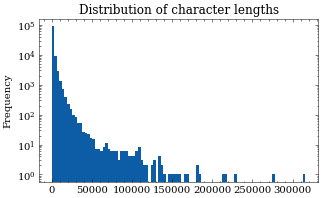

In [76]:
ndf.length.plot(kind="hist", bins=100, figsize=(5,3))
import matplotlib.pyplot as plt
plt.style.use("science,no-latex".split(","))
plt.semilogy()
plt.title("Distribution of character lengths")
plt.savefig("images/8_distribution.png")

In [77]:
ndf[ndf.per_token != {}].sample(500).to_json("8_dump_en-mk.json", orient="records", indent=4)

In [78]:
ndf.tail()

,text,variant,length,per_token,domain
url,,,,,
https://zzzfm.club/128587/,CkaчaTb пecHю Quavo - Lost (feat. Kid Cudi) (2...,UNK,139,{},zzzfm.club
https://zzzfm.club/12894/,CkaчaTb пecHю Melo D Bright feat. LCA - Give M...,UNK,600,{},zzzfm.club
https://zzzfm.club/51226/,CkaчaTb Myзыky бecплaTHo mp3 » Megan thee stal...,UNK,280,{},zzzfm.club
https://zzzfm.club/60701/,Diamond D - Turn It Up (Feat. Snoop Dogg & Cas...,UNK,373,{},zzzfm.club
https://zzzfm.club/6752/,"eminem, 50 cent - remember the name (feat. emi...",UNK,182,{},zzzfm.club


In [79]:
new_df = pd.DataFrame(
    data={"domain":
    ndf.domain.unique()}
)
a_ratio = []
b_ratio = []

for domain in new_df.domain:
    c1 = ndf.domain == domain
    cB = ndf.variant == "B"
    cA = ndf.variant == "A"

    Bs = sum(c1 & cB)
    As = sum(c1 & cA)
    document_count = sum(c1)
    a_ratio.append(As/document_count)
    b_ratio.append(Bs/document_count)

new_df["A"] = a_ratio
new_df["B"] = b_ratio


In [80]:
new_df.tail()

,domain,A,B
7515,zp.mk,1.0,0.0
7516,zplastdograma.com,0.0,0.0
7517,zvuch.club,0.0,0.0
7518,zyavinash00.medium.com,0.0,0.0
7519,zzzfm.club,0.0,0.0


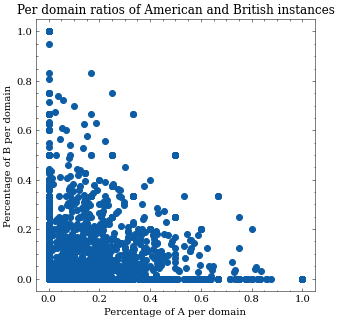

In [81]:
plt.figure(figsize=(5,5))
plt.scatter(new_df.A, new_df.B)
plt.xlabel("Percentage of A per domain")
plt.ylabel("Percentage of B per domain")
# plt.semilogx()
# plt.semilogy()
# plt.xlim((1e-3, 1.1))
# plt.ylim((1e-3, 1.1))
plt.title("Per domain ratios of American and British instances")
plt.show()

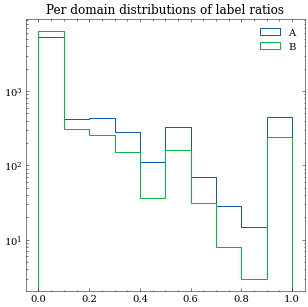

In [101]:
#plt.hist([new_df.A, new_df.B], bins=10, stacked=True, density=True)
plt.figure(figsize=(5,5))
plt.hist(new_df.A, bins=10, stacked=False, density=False, histtype="step", label="A")
plt.hist(new_df.B, bins=10, stacked=False, density=False, histtype="step", label="B")
plt.legend()
plt.semilogy()
plt.title("Per domain distributions of label ratios")
plt.savefig("images/8_per_domain_distributions.png")
plt.show()

In [91]:
new_df

,domain,A,B
0,11meats.com,0.000000,0.500000
1,2017.tourofbulgaria.com,0.000000,0.142857
2,2019.loveisfolly.com,0.071429,0.000000
3,2019.thequarantine.org,0.000000,0.000000
4,2020.loveisfolly.com,0.100000,0.000000
...,...,...,...
7515,zp.mk,1.000000,0.000000
7516,zplastdograma.com,0.000000,0.000000
7517,zvuch.club,0.000000,0.000000
7518,zyavinash00.medium.com,0.000000,0.000000
